In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
file = '/home/babreu/Science/covid19/repo/champaign_county/cuc.csv'
df = pd.read_csv(file,parse_dates=['date'])

In [10]:
df.sample(5)

,date,confirmed,deaths,recovered,curr_hospitalized,tests,active,conf/tests
16,2020-04-30,135,6,89,6,3128,40,0.043159
11,2020-04-25,104,5,81,6,2348,18,0.044293
10,2020-04-24,103,5,81,6,2279,17,0.045195
1,2020-04-15,90,2,55,5,1638,33,0.054945
12,2020-04-26,108,5,81,6,2475,22,0.043636


In [5]:
df['active'] = df['confirmed'] - df['recovered'] - df['deaths']

Text(0, 0.5, 'Cases')

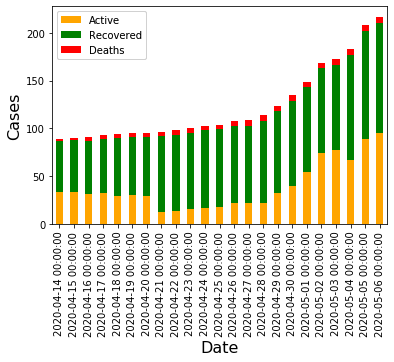

In [21]:
ax = df.plot.bar(x='date',y=['active','recovered','deaths'],stacked=True,color=['orange','green','red'],rot=90)
legend = matplotlib.pyplot.legend(['Active','Recovered','Deaths'])
ax.add_artist(legend)
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Cases',fontsize=16)

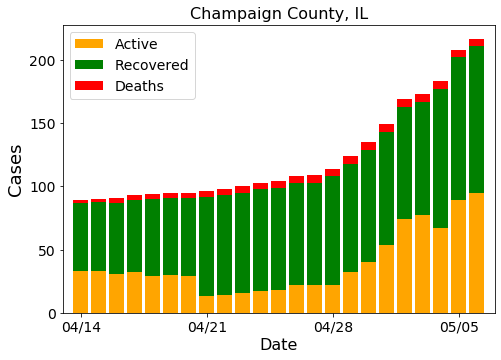

In [60]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import datetime

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['date'],df['active'],color=['orange'])
ax.bar(df['date'],df['recovered'],bottom=df['active'],color=['green'])
ax.bar(df['date'],df['deaths'],color=['red'],bottom=(df['active']+df['recovered']))

ax.set_ylabel('Cases')
ax.set_title('Champaign County, IL',fontsize=16)
ax.legend(labels=['Active','Recovered','Deaths'],fontsize=14)
date_form = DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Cases',fontsize=18)
ax.set_xlim(datetime.date(2020,4,13), datetime.date(2020,5,7))

plt.tick_params(labelsize=14)
plt.show()

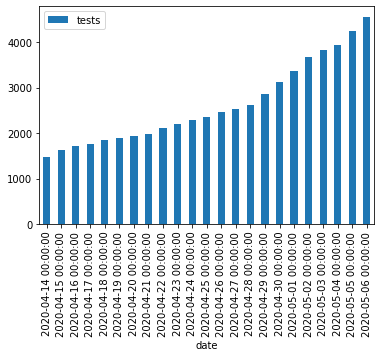

In [7]:
ax.clear()
ax = df.plot.bar(x='date',y=['tests'])

In [8]:
df['conf/tests'] = df['confirmed'] / df['tests']
df.sample(5)

,date,confirmed,deaths,recovered,curr_hospitalized,tests,active,conf/tests
7,2020-04-21,96,4,79,6,1983,13,0.048411
5,2020-04-19,95,4,61,6,1889,30,0.050291
1,2020-04-15,90,2,55,5,1638,33,0.054945
22,2020-05-06,217,6,116,6,4559,95,0.047598
9,2020-04-23,100,5,79,6,2208,16,0.045290


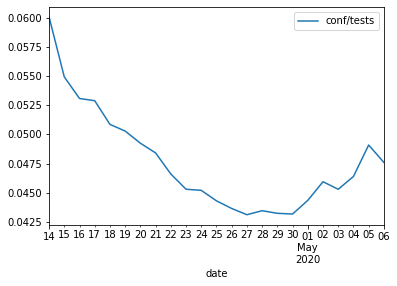

In [9]:
ax.clear()
ax = df.plot(x='date',y=['conf/tests'])